# Gender Classification with CNN - UTKFace Dataset
This project demonstrates gender classification using Convolutional Neural Networks (CNN) on the UTKFace dataset. The dataset contains facial images with attributes such as age, gender, and ethnicity.

## Steps:
1. Download the dataset
2. Preprocess the images
3. Build and compile the CNN model
4. Train the model
5. Evaluate and visualize results

---

## 1. Import Necessary Libraries


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub  # For downloading datasets from Kaggle
import cv2  # For image processing
from sklearn.model_selection import train_test_split  # For splitting dataset into train and test sets
from tensorflow.keras.models import Sequential  # For defining the neural network architecture
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Layers of the CNN
from tensorflow.keras.optimizers import Adam  # Optimizer for training
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation
from tensorflow.keras.utils import plot_model  # For visualizing the model architecture
from sklearn.metrics import confusion_matrix, classification_report  # For evaluation

## 2. Download Dataset

In [3]:
# Download the dataset from Kaggle
path = kagglehub.dataset_download("jangedoo/utkface-new")
DATASET_PATH = os.path.join(path, "UTKFace")
print("Path to dataset files:", DATASET_PATH)

100%|██████████| 331M/331M [00:01<00:00, 184MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/UTKFace


## 3. Load Images and Extract Gender Labels

In [4]:
# Define image size and initialize lists to store image data and labels
IMG_SIZE = 64
data = []
labels = []

# Load images and extract labels from filenames
for file in os.listdir(DATASET_PATH):
    if file.endswith(".jpg"):  # Process only jpg images
        try:
            gender = int(file.split("_")[1])  # Extract gender label (0 for male, 1 for female)
            img = cv2.imread(os.path.join(DATASET_PATH, file))  # Read image
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0  # Resize and normalize
            data.append(img)
            labels.append(gender)
        except:
            continue

# Convert to numpy arrays for further processing
data, labels = np.array(data), np.array(labels)


## 4. Split Data into Training and Test Sets

In [5]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)


## 5. Set Up Data Augmentation

In [6]:
# Apply data augmentation to reduce overfitting
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)  # Random rotations and flips
datagen.fit(X_train)  # Fit augmentation parameters on training data

## 6. Build CNN Model

In [7]:
# Define CNN architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (male/female)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()  # Display model summary


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

## 7. Train the Model

In [8]:
# Train the model using augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=10,  # Number of epochs
                    verbose=1)  # Show training progress

# Save the trained model
model.save('cnn_gender_classifier.keras')


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


593/593 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.6948 - loss: 0.5679 - val_accuracy: 0.8283 - val_loss: 0.3851
Epoch 2/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.8284 - loss: 0.3778 - val_accuracy: 0.8490 - val_loss: 0.3283
Epoch 3/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.8534 - loss: 0.3325 - val_accuracy: 0.8648 - val_loss: 0.3121
Epoch 4/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.8612 - loss: 0.3114 - val_accuracy: 0.8758 - val_loss: 0.3070
Epoch 5/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.8653 - loss: 0.2958 - val_accuracy: 0.8743 - val_loss: 0.3018
Epoch 6/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.8760 - loss: 0.2843 - val_accuracy: 0.8792 - val_loss: 0.2903
Epoch 7/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.8772 - loss: 0.2799 - val_accuracy: 0.8827 - val_loss: 0.2873
Epoch 8/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.8853 - loss: 0.2667 - val_accurac

## 8. Visualize Model Architecture

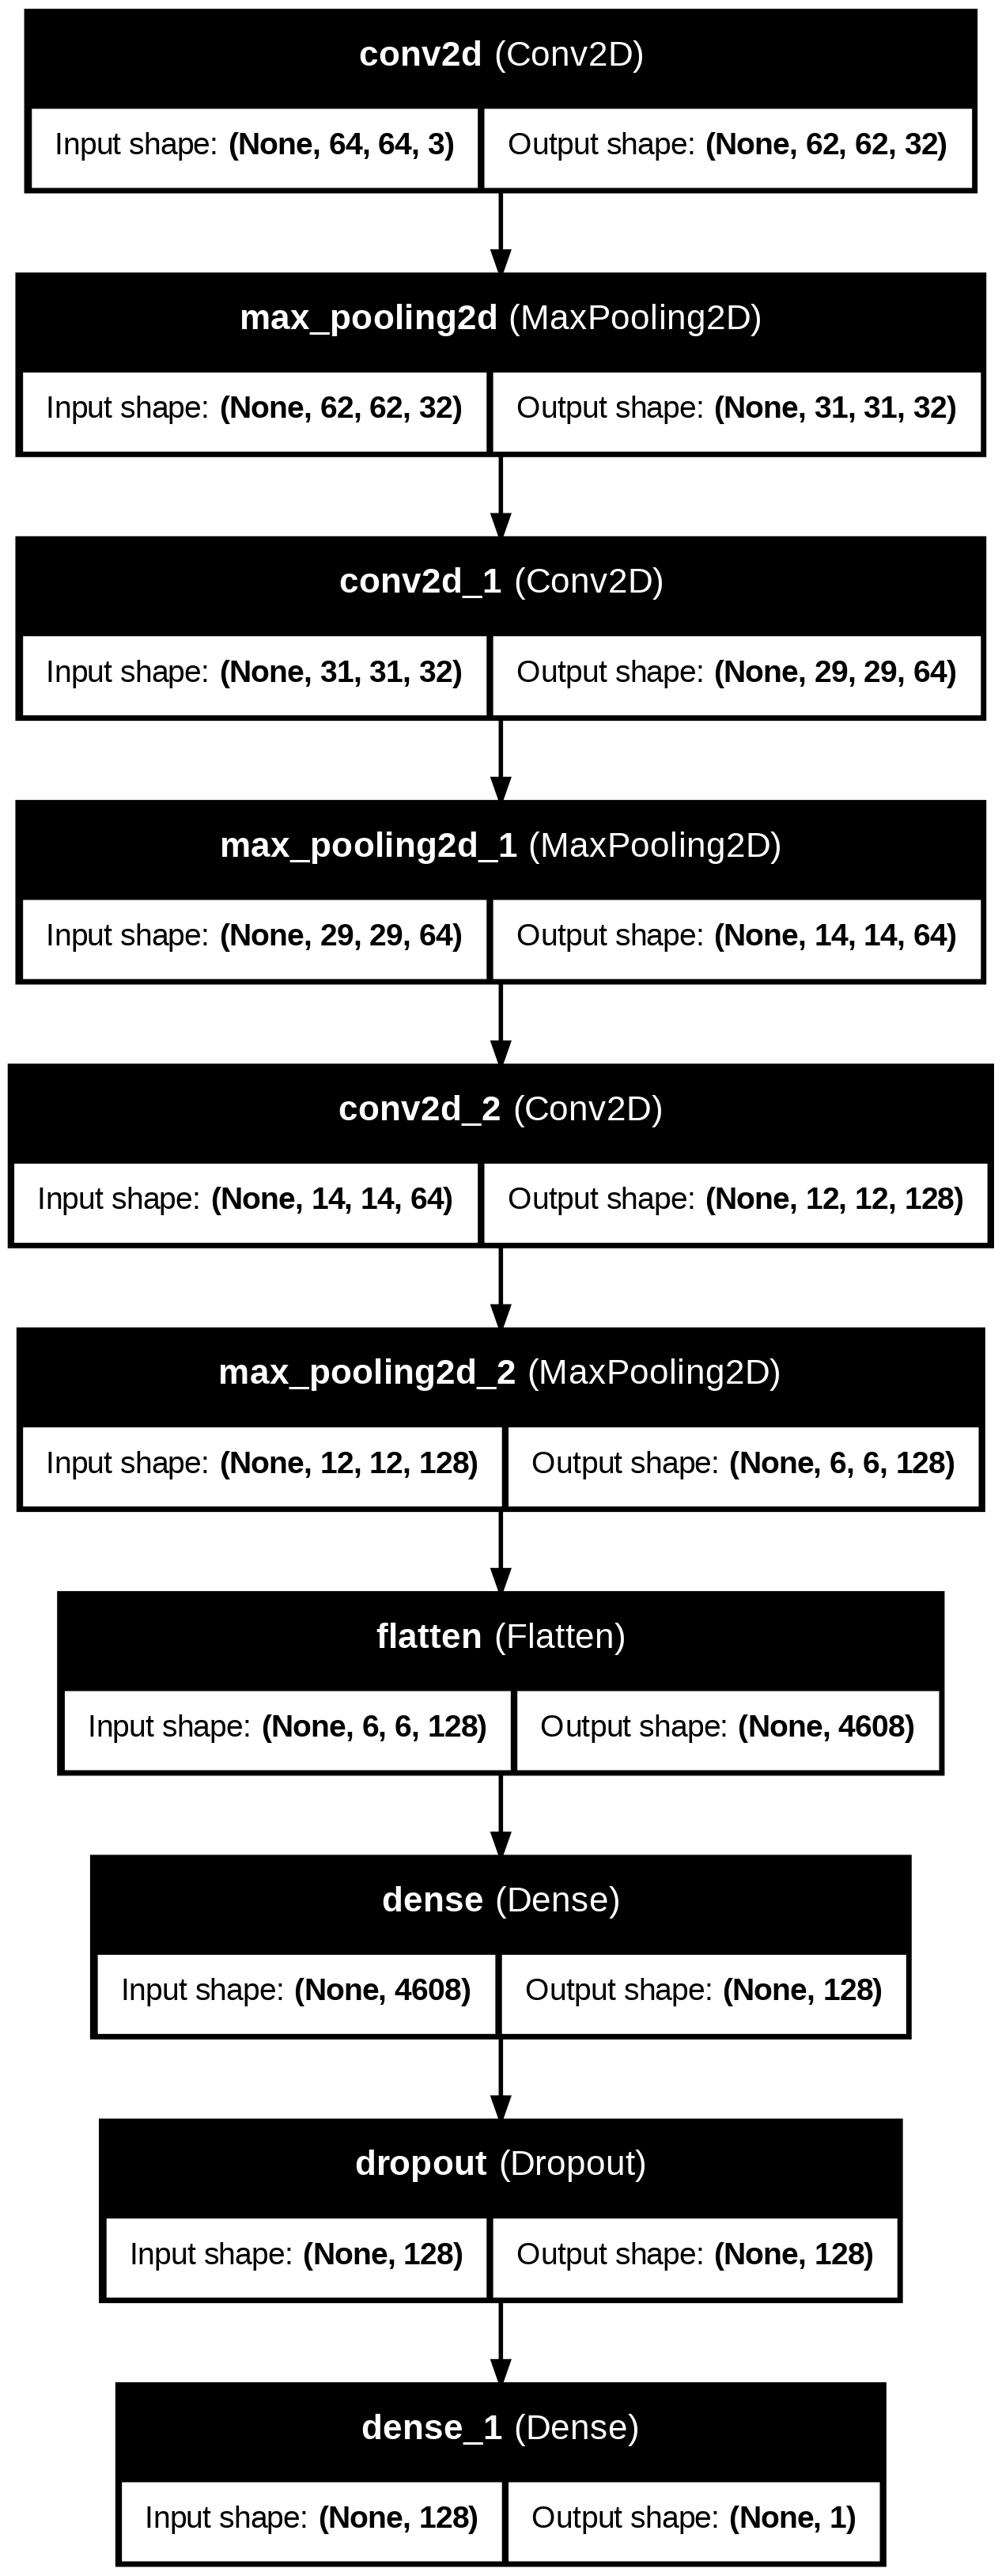

In [9]:
# Plot model architecture and save as PNG
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## 9. Plot Training History

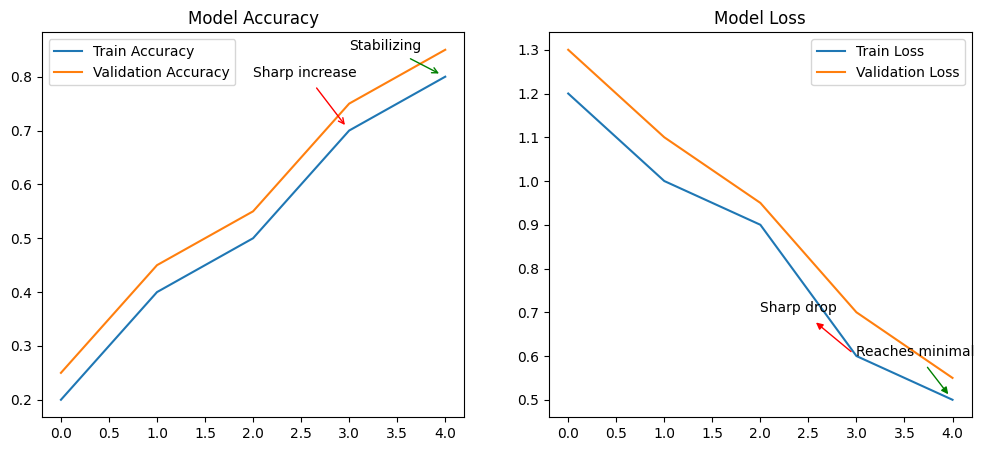

In [15]:
# Example data for history (replace with your actual history object)
history = {
    'accuracy': [0.2, 0.4, 0.5, 0.7, 0.8],
    'val_accuracy': [0.25, 0.45, 0.55, 0.75, 0.85],
    'loss': [1.2, 1.0, 0.9, 0.6, 0.5],
    'val_loss': [1.3, 1.1, 0.95, 0.7, 0.55]
}

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Add arrow annotation for major points in accuracy with a different style and thinner line
plt.annotate('Sharp increase',
             xy=(3, 0.7),  # Point to annotate (x, y)
             xytext=(2, 0.8),  # Where to place the text
             arrowprops=dict(facecolor='blue', edgecolor='Red', linewidth=1, arrowstyle='->', shrinkA=5, shrinkB=5))

plt.annotate('Stabilizing',
             xy=(4, 0.8),
             xytext=(3, 0.85),
             arrowprops=dict(facecolor='green', edgecolor='green', linewidth=1, arrowstyle='->', shrinkA=5, shrinkB=5))

plt.savefig('accuracy_plot.png')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

# Add arrow annotation for major points in loss
plt.annotate('Sharp drop',
             xy=(3, 0.6),  # Point to annotate (x, y)
             xytext=(2, 0.7),  # Where to place the text
             arrowprops=dict(facecolor='red', edgecolor='red', linewidth=1, arrowstyle='<|-', shrinkA=5, shrinkB=5))

plt.annotate('Reaches minimal',
             xy=(4, 0.5),
             xytext=(3, 0.6),
             arrowprops=dict(facecolor='Green', edgecolor='Green', linewidth=1, arrowstyle='-|>', shrinkA=5, shrinkB=5))

plt.savefig('loss_plot.png')

plt.show()


# 10. Evaluate the Model

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


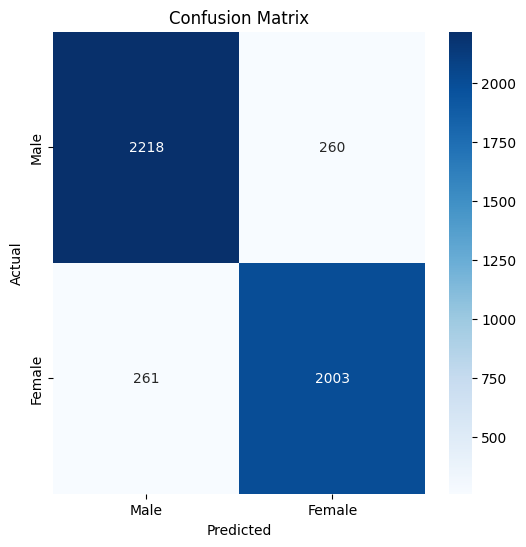

              precision    recall  f1-score   support

        Male       0.89      0.90      0.89      2478
      Female       0.89      0.88      0.88      2264

    accuracy                           0.89      4742
   macro avg       0.89      0.89      0.89      4742
weighted avg       0.89      0.89      0.89      4742

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8832 - loss: 0.2716
Final Test Accuracy: 0.89


In [11]:
# Make predictions and evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert predictions to binary (0 or 1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Male", "Female"], yticklabels=["Male", "Female"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('confusion_matrix.png')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=["Male", "Female"]))  # Detailed metrics

# Final Test Accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)  # Evaluate on test data
print(f"Final Test Accuracy: {test_acc:.2f}")  # Display test accuracy


 ## 11.sample predictions

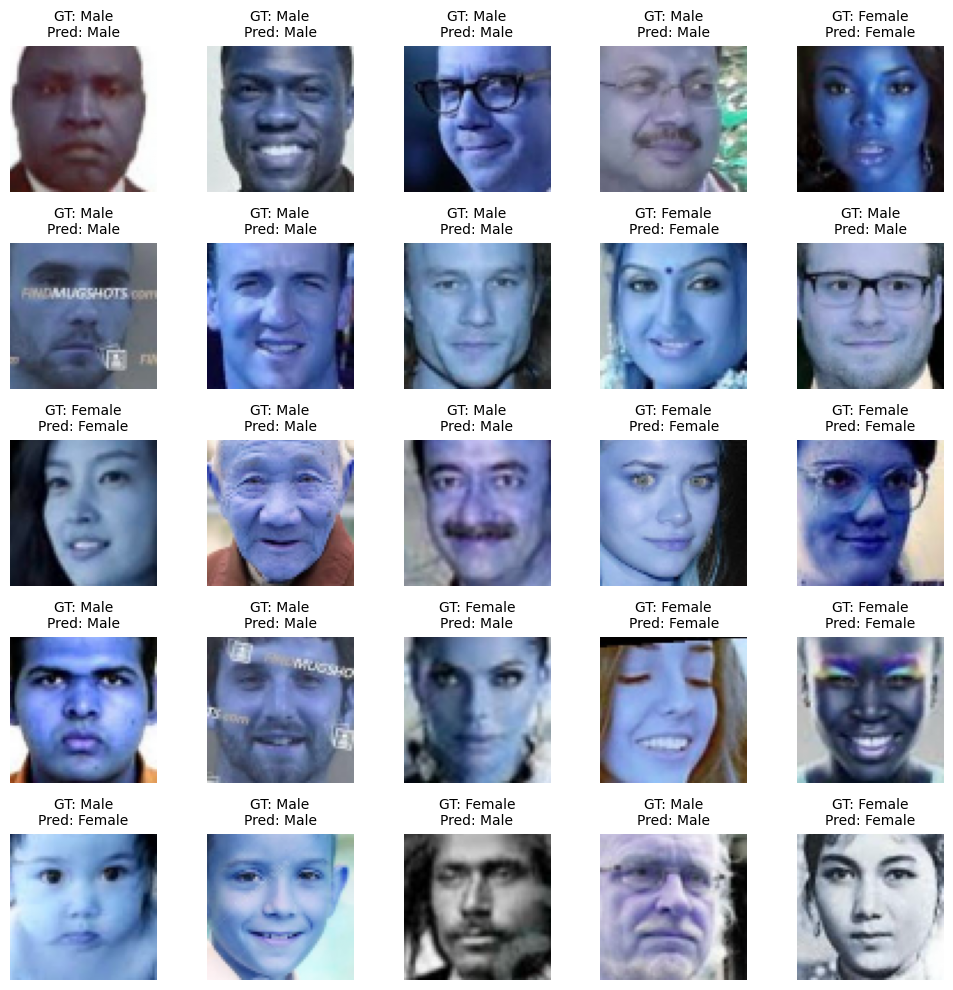

In [12]:
# Display and save sample predictions
fig, axes = plt.subplots(5, 5, figsize=(10,10))  # Display 25 sample predictions
axes = axes.ravel()  # Flatten the axes array
for i in np.arange(0, 25):
    img = X_test[i]  # Get the image
    true_label = "Male" if y_test[i] == 0 else "Female"  # True label
    pred_label = "Male" if y_pred[i] == 0 else "Female"  # Predicted label
    axes[i].imshow(img)  # Display the image
    axes[i].set_title(f"GT: {true_label}\nPred: {pred_label}", fontsize=10)  # Title with ground truth and predicted label
    axes[i].axis('off')  # Turn off axis labels

plt.tight_layout()  # Adjust the layout to avoid overlap
plt.savefig('sample_predictions.png')  # Save the figure as a PNG file
plt.show()  # Show the plot